In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Task 1: Import the cell cycle dataset excel spreadsheet (using Pandas). 
df = pd.read_excel('~/Documents/biology/Cell-Cycle-Set.xlsx')
df.head()

#  You may need to do some tidying of the data such as dropping rows with missing NaN values.
df = df.dropna()

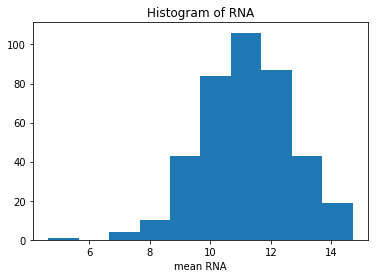

In [16]:
# Perform exploratory analysis of the data, thus:
# Generate a histogram of one of the cell cycle stages of the RNA and protein distribution. 
# Do you notice anything interesting with regards to the mean/variance of the distribution?
plt.hist(df['mean_RNA_G1'])
plt.title('Histogram of RNA')
plt.xlabel('mean RNA')
plt.show()

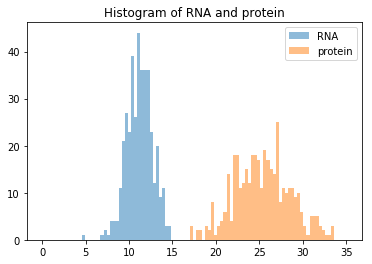

In [17]:
bins = np.linspace(0, 35, 100)

plt.hist(df['mean_RNA_G1'], bins, alpha=0.5, label='x')
plt.hist(df['mean_protein_G1'], bins, alpha=0.5, label='y')
#plt.hist(df['mean_protein_G1'])
plt.legend(['RNA', 'protein'])
plt.title('Histogram of RNA and protein')
plt.show()

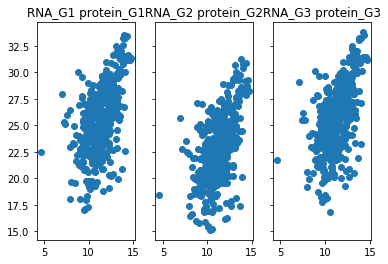

In [18]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
x1 = df['mean_RNA_G1']
y1 = df['mean_protein_G1']
x2 = df['mean_RNA_S']
y2 = df['mean_protein_S']
x3 = df['mean_RNA_G2']
y3 = df['mean_protein_G2']
#  scatter with names
ax1.plot(x1, y1, "o")
ax1.set_title('RNA_G1 protein_G1')
ax2.plot(x2, y2, "o")
ax2.set_title('RNA_G2 protein_G2')
ax3.plot(x3, y3, "o")
ax3.set_title('RNA_G3 protein_G3')
plt.show()

Look at the pairwise correlations between each of the RNA/protein columns (this can be achieved using the corr() function). Does the change in timestep have much effect on the relationship(s) between RNA and protein?

In [19]:
df.corr()

,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2
mean_RNA_G1,1.000000,0.991063,0.992023,0.522658,0.541428,0.544206
mean_RNA_S,0.991063,1.000000,0.986836,0.514705,0.536190,0.534322
mean_RNA_G2,0.992023,0.986836,1.000000,0.510364,0.529690,0.532565
mean_protein_G1,0.522658,0.514705,0.510364,1.000000,0.970289,0.977016
mean_protein_S,0.541428,0.536190,0.529690,0.970289,1.000000,0.975964
mean_protein_G2,0.544206,0.534322,0.532565,0.977016,0.975964,1.000000


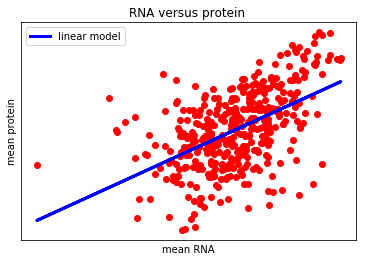

In [20]:
# Generate a scatterplot of the RNA versus protein for each cell cycle stage. 
# Fit a linear model to the data, can we infer protein concentration from RNA concentration?
from sklearn import linear_model
lm = linear_model.LinearRegression()
x1 = df['mean_RNA_G1'][:, np.newaxis]
y1 = df['mean_protein_G1'][:, np.newaxis]
model = lm.fit(x1,y1)
y_predict = lm.predict(x1)
# Plot outputs
plt.scatter(x1, y1,  color='red')
plt.plot(x1, y_predict, color='blue', linewidth=3)
plt.title('RNA versus protein ')
plt.ylabel('mean protein')
plt.xlabel('mean RNA')

plt.xticks(())
plt.yticks(())
plt.legend(['linear model'])
plt.show()

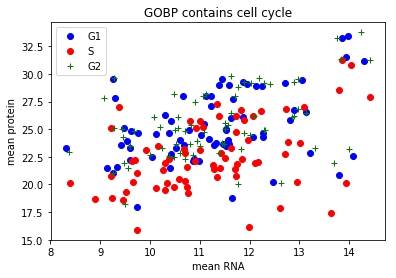

In [21]:
df_GOBP = df[df['GOBP'].str.contains("cell cycle")]
x1 = df_GOBP['mean_RNA_G1']
y1 = df_GOBP['mean_protein_G1']   
x2 = df_GOBP['mean_RNA_S']
y2 = df_GOBP['mean_protein_S']
x3 = df_GOBP['mean_RNA_G2']
y3 = df_GOBP['mean_protein_G2']
plt.plot(x1, y1, "bo")
plt.plot(x2, y2, "ro")
plt.plot(x3, y3, "g+")
plt.title('GOBP contains cell cycle')
plt.ylabel('mean protein')
plt.xlabel('mean RNA')
plt.legend(['G1','S','G2'])
plt.show()

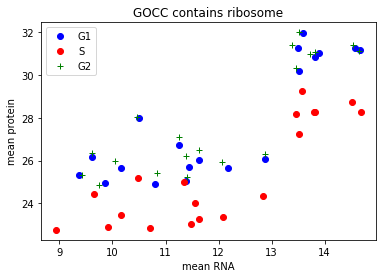

In [22]:
df_GOCC = df[df['GOCC'].str.contains("ribosome")]
x1 = df_GOCC['mean_RNA_G1']
y1 = df_GOCC['mean_protein_G1']   
x2 = df_GOCC['mean_RNA_S']
y2 = df_GOCC['mean_protein_S']
x3 = df_GOCC['mean_RNA_G2']
y3 = df_GOCC['mean_protein_G2']
plt.plot(x1, y1, "bo")
plt.plot(x2, y2, "ro")
plt.plot(x3, y3, "g+")
plt.title('GOCC contains ribosome')
plt.ylabel('mean protein')
plt.xlabel('mean RNA')
plt.legend(['G1','S','G2'])
plt.show()

In [23]:
# Count the number of occurrences of every GOBP term across all genes, 
# what are some of the difficulties that arise when using these terms?

In [24]:
d = dict()
for i in df['GOBP']:
    lst = i.split(';')
    for el in lst:
        if el in d:
            d[el] += 1
        else:
            d[el] = 1
import operator
sorted_x = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
for key, v in sorted_x:
    print(v, ' : ', key)

377  :  cellular process
273  :  metabolic process
260  :  cellular metabolic process
255  :  primary metabolic process
236  :  biological regulation
225  :  regulation of biological process
211  :  macromolecule metabolic process
211  :  regulation of cellular process
201  :  cellular macromolecule metabolic process
167  :  nitrogen compound metabolic process
166  :  cellular nitrogen compound metabolic process
158  :  nucleobase-containing compound metabolic process
148  :  response to stimulus
145  :  cellular component organization or biogenesis
144  :  nucleic acid metabolic process
142  :  cellular component organization
141  :  regulation of metabolic process
130  :  regulation of cellular metabolic process
125  :  regulation of primary metabolic process
123  :  regulation of macromolecule metabolic process
122  :  cellular component organization or biogenesis at cellular level
119  :  RNA metabolic process
119  :  cellular component organization at cellular level
118  :  biosyn

4  :  protein autophosphorylation
4  :  regulation of microtubule-based process
4  :  regulation of mitosis
4  :  regulation of nuclear division
4  :  positive regulation of cell growth
4  :  brain development
4  :  cell projection assembly
4  :  negative regulation of mitotic cell cycle
4  :  negative regulation of sequence-specific DNA binding transcription factor activity
4  :  organ morphogenesis
4  :  regulation of angiogenesis
4  :  regulation of Wnt receptor signaling pathway
4  :  tissue morphogenesis
4  :  actin filament capping
4  :  negative regulation of actin filament depolymerization
4  :  negative regulation of actin filament polymerization
4  :  negative regulation of protein complex assembly
4  :  negative regulation of protein complex disassembly
4  :  negative regulation of protein polymerization
4  :  regulation of actin filament depolymerization
4  :  regulation of protein complex disassembly
4  :  organelle assembly
4  :  cellular nitrogen compound catabolic proce

2  :  protein K11-linked ubiquitination
2  :  androgen receptor signaling pathway
2  :  negative regulation of myeloid cell differentiation
2  :  positive regulation of MAPKKK cascade
2  :  positive regulation of osteoblast differentiation
2  :  regulation of ossification
2  :  regulation of osteoblast differentiation
2  :  regulation of T cell proliferation
2  :  JAK-STAT cascade
2  :  ncRNA catabolic process
2  :  rRNA catabolic process
2  :  cell activation involved in immune response
2  :  leukocyte activation involved in immune response
2  :  lymphocyte activation involved in immune response
2  :  regulation of transmembrane receptor protein serine/threonine kinase signaling pathway
2  :  positive regulation of cytokine biosynthetic process
2  :  regulation of epidermal growth factor-activated receptor activity
2  :  regulation of protein tyrosine kinase activity
1  :  cytidine to uridine editing
1  :  mRNA modification
1  :  cell adhesion mediated by integrin
1  :  cell-cell adhe

1  :  urate metabolic process
1  :  negative regulation of S phase of mitotic cell cycle
1  :  neural retina development
1  :  positive regulation by host of viral transcription
1  :  regulation of S phase
1  :  regulation of S phase of mitotic cell cycle
1  :  centromeric heterochromatin formation
1  :  chromatin assembly
1  :  chromatin silencing
1  :  gene silencing
1  :  heterochromatin formation
1  :  heterochromatin organization
1  :  leukocyte proliferation
1  :  lymphocyte proliferation
1  :  maintenance of DNA methylation
1  :  methylation-dependent chromatin silencing
1  :  mononuclear cell proliferation
1  :  negative regulation of gene expression, epigenetic
1  :  smooth muscle cell proliferation
1  :  establishment of mitotic spindle localization
1  :  establishment of mitotic spindle orientation
1  :  establishment of organelle localization
1  :  establishment of spindle localization
1  :  establishment of spindle orientation
1  :  microtubule bundle formation
1  :  negat

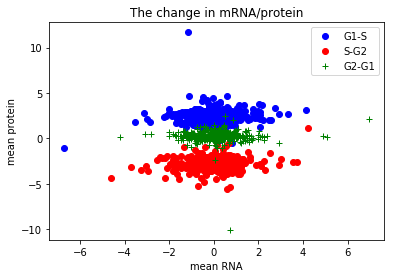

In [39]:
# Calculate the change in mRNA/protein level across the cell cycle by taking the difference at each stage 
# (G1-S, S-G2, G2-G1), and standardize the differences by mean-centering and variance scaling. 
# Repeat tasks 1 and 2 by plotting the changes in levels with GOBP/GOCC labelling. 
# What do we notice about changes in the cell cycle? Is there any apparent clustering of GO terms?

x1 = df['mean_RNA_G1']-df['mean_RNA_S']
mean_x1 = sum(x1)/len(x1)
y1 = df['mean_protein_G1']-df['mean_protein_S']   
x2 = df['mean_RNA_S']-df['mean_RNA_G2']
mean_x2 = sum(x2)/len(x2)
y2 = df['mean_protein_S']-df['mean_protein_G2']
x3 = df['mean_RNA_G2']-df['mean_RNA_G1']
mean_x3 = sum(x3)/len(x3)
y3 = df['mean_protein_G2']-df['mean_protein_G1']
plt.plot((x1-mean_x1)/np.std(x1), y1, "bo")
plt.plot((x2-mean_x2)/np.std(x2), y2, "ro")
plt.plot((x3-mean_x3)/np.std(x3), y3, "g+")
plt.title('The change in mRNA/protein')
plt.ylabel('mean protein')
plt.xlabel('mean RNA')
plt.legend(['G1-S','S-G2','G2-G1'])
plt.show()

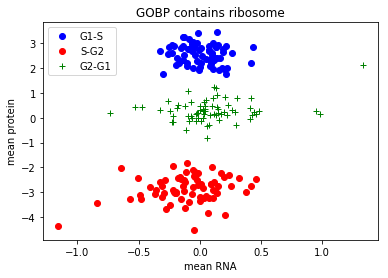

In [26]:
x1 = df_GOBP['mean_RNA_G1']-df_GOBP['mean_RNA_S']
y1 = df_GOBP['mean_protein_G1']-df_GOBP['mean_protein_S']   
x2 = df_GOBP['mean_RNA_S']-df_GOBP['mean_RNA_G2']
y2 = df_GOBP['mean_protein_S']-df_GOBP['mean_protein_G2']
x3 = df_GOBP['mean_RNA_G2']-df_GOBP['mean_RNA_G1']
y3 = df_GOBP['mean_protein_G2']-df_GOBP['mean_protein_G1']
plt.plot(x1, y1, "bo")
plt.plot(x2, y2, "ro")
plt.plot(x3, y3, "g+")
plt.title('GOBP contains ribosome')
plt.ylabel('mean protein')
plt.xlabel('mean RNA')
plt.legend(['G1-S','S-G2','G2-G1'])
plt.show()

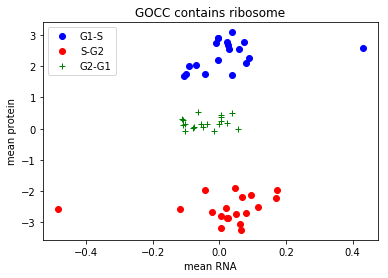

In [28]:
x1 = df_GOCC['mean_RNA_G1']-df_GOCC['mean_RNA_S']
y1 = df_GOCC['mean_protein_G1']-df_GOCC['mean_protein_S']   
x2 = df_GOCC['mean_RNA_S']-df_GOCC['mean_RNA_G2']
y2 = df_GOCC['mean_protein_S']-df_GOCC['mean_protein_G2']
x3 = df_GOCC['mean_RNA_G2']-df_GOCC['mean_RNA_G1']
y3 = df_GOCC['mean_protein_G2']-df_GOCC['mean_protein_G1']
plt.plot(x1, y1, "bo")
plt.plot(x2, y2, "ro")
plt.plot(x3, y3, "g+")
plt.title('GOCC contains ribosome')
plt.ylabel('mean protein')
plt.xlabel('mean RNA')
plt.legend(['G1-S','S-G2','G2-G1'])
plt.show()

In [32]:
d3 = {0:'A',1:'R',2:'N',3:'D',4:'C',5:'Q',6:'E',7:'G',8:'H',9:'I',10:'L',11:'K',12:'M',13:'F',14:'P',15:'S',16:'T',17:'W',18:'Y',19:'V'}
d4 = {'A':0,'R':1,'N':2,'D':3,'C':4,'Q':5,'E':6,'G':7,'H':8,'I':9,'L':10,'K':11,'M':12,'F':13,'P':14,'S':15,'T':16,'W':17,'Y':18,'V':19}

file = open('./Documents/biology/blosum50.txt','r')
ar = np.loadtxt(file, dtype='int')
file.close()
s = '  '
for i in d4.keys():
    s+= (' ' + i + ' ')
s+='\n'
for i in range(20):
    s+=d3[i]+' '
    for j in range(20):
        k = 3
        if ar[i][j]>=0:
            s+=' '
            k = 2
        s+=str(ar[i][j])
        for x in range(0, k-len(str(ar[i][j]))):
            s+=' '
    s+='\n'
print(s)

   A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V 
A  5 -2 -1 -2 -1 -1 -1  0 -2 -1 -2 -1 -1 -3 -1  1  0 -3 -2  0 
R -2  7 -1 -2 -4  1  0 -3  0 -4 -3  3 -2 -3 -3 -1 -1 -3 -1 -3 
N -1 -1  7  2 -2  0  0  0  1 -3 -4  0 -2 -4 -2  1  0 -4 -2 -3 
D -2 -2  2  8 -4  0  2 -1 -1 -4 -4 -1 -4 -5 -1  0 -1 -5 -3 -4 
C -1 -4 -2 -4  13-3 -3 -3 -3 -2 -2 -3 -2 -2 -4 -1 -1 -5 -3 -1 
Q -1  1  0  0 -3  7  2 -2  1 -3 -2  2  0 -4 -1  0 -1 -1 -1 -3 
E -1  0  0  2 -3  2  6 -3  0 -4 -3  1 -2 -3 -1 -1 -1 -3 -2 -3 
G  0 -3  0 -1 -3 -2 -3  8 -2 -4 -4 -2 -3 -4 -2  0 -2 -3 -3 -4 
H -2  0  1 -1 -3  1  0 -2  10-4 -3  0 -1 -1 -2 -1 -2 -3  2 -4 
I -1 -4 -3 -4 -2 -3 -4 -4 -4  5  2 -3  2  0 -3 -3 -1 -3 -1  4 
L -2 -3 -4 -4 -2 -2 -3 -4 -3  2  5 -3  3  1 -4 -3 -1 -2 -1  1 
K -1  3  0 -1 -3  2  1 -2  0 -3 -3  6 -2 -4 -1  0 -1 -3 -2 -3 
M -1 -2 -2 -4 -2  0 -2 -3 -1  2  3 -2  7  0 -3 -2 -1 -1  0  1 
F -3 -3 -4 -5 -2 -4 -3 -4 -1  0  1 -4  0  8 -4 -3 -2  1  4 -1 
P -1 -3 -2 -1 -4 -1 -1 -2 -2 -3 -4 -1 -3 -4  10-1 -1 -4

In [53]:
# Run this on HEAGAWGHEE versus PAWHEAE
d1 = {1:'H',2:'E',3:'A',4:'G',5:'A',6:'W',7:'G',8:'H',9:'E',10:'E'}
d2 = {1:'P',2:'A',3:'W',4:'H',5:'E',6:'A',7:'E'}
ar_ = np.zeros((8, 11))
ar_[0][0]=0
for i in range(1,11):
    ar_[0][i] = -8 + ar_[0][i-1]
for j in range(1,8):
    ar_[j][0] = -8 + ar_[j-1][0]
for j in range(1,11):
    for i in range(1,8):
        c = ar[d4[d1[j]], d4[d2[i]]]
        max_ = max(c+ar_[i-1][j-1] , ar_[i-1][j]-8, ar_[i][j-1]-8)
        ar_[i][j] = max_
print(ar_)

[[  0.  -8. -16. -24. -32. -40. -48. -56. -64. -72. -80.]
 [ -8.  -2.  -9. -17. -25. -33. -41. -49. -57. -65. -73.]
 [-16. -10.  -3.  -4. -12. -20. -28. -36. -44. -52. -60.]
 [-24. -18. -11.  -6.  -7. -15.  -5. -13. -21. -29. -37.]
 [-32. -14. -18. -13.  -8.  -9. -13.  -7.  -3. -11. -19.]
 [-40. -22.  -8. -16. -16.  -9. -12. -15.  -7.   3.  -5.]
 [-48. -30. -16.  -3. -11. -11. -12. -12. -15.  -5.   2.]
 [-56. -38. -24. -11.  -6. -12. -14. -15. -12.  -9.   1.]]


this is **awesome**
## jghfjhgf
